# Pandas Fundamentals - I

This notebook was created by Ryan Abernathey (© Copyright 2016-2021) and is part of the [An Introduction to Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html) textbook.

All content in this book (ie, any files and content in the content/ folder) is licensed under the [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/) (CC BY-SA 4.0) license.

This notebook demonstrates basic features of the `pandas` python package. 

`Pandas` is an extension to python, so we first have to import the package before we can run anything else. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

(Data are from the NASA [Planetary Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/).)

In [2]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

Series have built in plotting methods.

<Axes: >

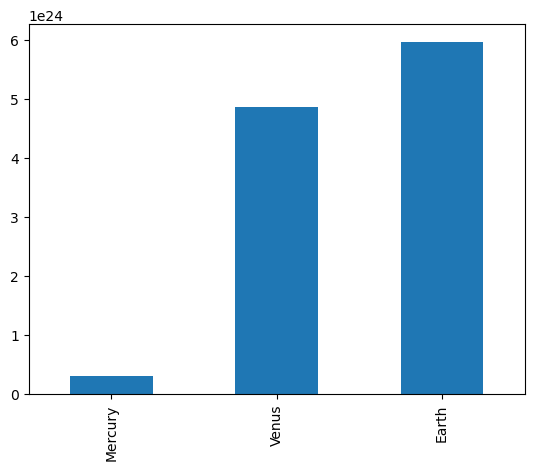

In [3]:
masses.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

We can access the underlying index object if we need to:

In [5]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='str')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [6]:
masses.loc['Earth']

np.float64(5.97e+24)

Or by raw position using `.iloc`

In [7]:
masses.iloc[2]

np.float64(5.97e+24)

We can pass a list or array to loc to get multiple rows back:

In [8]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

And we can even use slice notation

In [9]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [10]:
masses.iloc[:2]

Mercury    3.000000e+23
Venus      4.870000e+24
dtype: float64

If we need to, we can always get the raw data back out as well

In [11]:
masses.values # a numpy array

array([3.00e+23, 4.87e+24, 5.97e+24])

In [12]:
masses.index # a pandas Index object

Index(['Mercury', 'Venus', 'Earth'], dtype='str')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [13]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [14]:
df.info()

<class 'pandas.DataFrame'>
Index: 3 entries, Mercury to Earth
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mass             3 non-null      float64
 1   diameter         3 non-null      float64
 2   rotation_period  2 non-null      float64
dtypes: float64(3)
memory usage: 113.0 bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [15]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [16]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.157500e+02
dtype: float64

In [17]:
df.std()

mass               3.006765e+24
diameter           4.371744e+06
rotation_period    9.784237e+02
dtype: float64

In [18]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [19]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

...or using attribute syntax.

In [20]:
df.mass

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

Indexing works very similar to series

In [21]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [22]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

But we can also specify the column we want to access

In [23]:
df.loc['Earth', 'mass']

np.float64(5.97e+24)

In [24]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

If we make a calculation using columns from the DataFrame, it will keep the same index:

In [25]:
volume =  4/3 * np.pi * (df.diameter/2)**3
df.mass / volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

Which we can easily add as another column to the DataFrame:

In [26]:
df['density'] = df.mass / volume
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [27]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [28]:
# returns a new DataFrame
df.join(temperature)

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


In [29]:
# returns a new DataFrame
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [30]:
# returns a new DataFrame
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful

In [31]:
adults = df[df.mass > 4e24]
adults

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [32]:
df['is_big'] = df.mass > 4e24
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,True
Earth,5.970000e+24,12756000.0,23.9,5493.285577,True


### Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [33]:
df.loc['Earth', 'mass'] = 5.98+24
df.loc['Venus', 'diameter'] += 1
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104001.0,NaN,5244.977070,True
Earth,2.998000e+01,12756000.0,23.9,5493.285577,True


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<Axes: xlabel='mass', ylabel='diameter'>

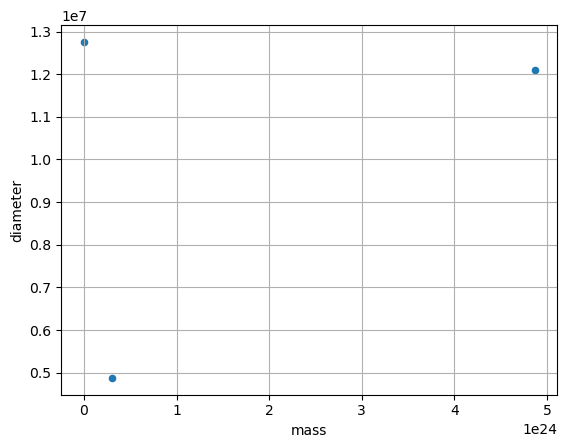

In [34]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<Axes: >

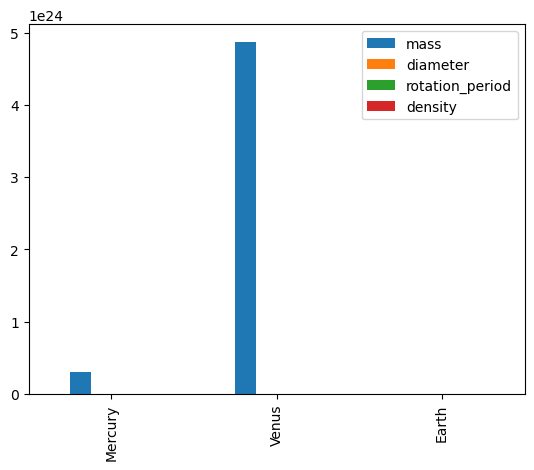

In [35]:
df.plot(kind='bar')

## Reading Data Files: Palmer Penguin Data 

In this example, we will use data from the Palmer Archipelago Penguins. This dataset has become a popular example dataset for environmental analysis, because it is comparatively simple to understand and has some nice features for analysis. (see e.g. [here](https://allisonhorst.github.io/palmerpenguins/articles/intro.html)) 

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://pal.lternet.edu/), part of the [US Long Term Ecological Research Network](https://lternet.edu/). The data are originally from the [Environmental Data Initiative (EDI) Data Portal](https://environmentaldatainitiative.org/), and are available for use by CC0 license (“No Rights Reserved”) in accordance with the [Palmer Station Data Policy](https://pal.lternet.edu/data/policies).

To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

In [42]:
df_penguins = pd.read_csv('../Data/palmer_penguin_data.csv')
df_penguins

,,,,,,Data originally published in: Gorman KB,Williams TD,Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081
rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
3,Adelie,Torgersen,40.3,18,195,3250,female,2007
4,Adelie,Torgersen,nan,nan,nan,NaN,NaN,2007
...,...,...,...,...,...,...,...,...
340,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
341,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
342,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
343,Chinstrap,Dream,50.8,19,210,4100,male,2009


This does not look right. It looks like that there is an extra line at the top, with some information about the dataset. We also see that there is some data that seems to be missing. If we look directly into the csv, we see that these are indicated with `"NA"` This is something that we should address directly. 

The `pd.read_csv()` method has many options for ingesting data: 

In [43]:

import pandas as pd
df_penguins = pd.read_csv('../Data/palmer_penguin_data.csv',
                          sep = ',',
                          na_values='NA',
                          skiprows= 1,
                          )
df_penguins

df_penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


This looks better 

Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [44]:
df_penguins.info()

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    str    
 2   island             344 non-null    str    
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    str    
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), str(3)
memory usage: 30.2 KB


### Quick Statistics

We can calculate basic statistics for columns that are `numeric`. We can see that this simply skips any columns with text. 

In [45]:
df_penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


For columns with text, we can get counts on how often each value occurs. Calculating this for `numeric` columns does not make sense, so we only select the columns that contain text.

In [47]:
text_columns = ['species', 'island', 'sex']
df_penguins[text_columns].value_counts()

species    island     sex   
Gentoo     Biscoe     male      61
                      female    58
Chinstrap  Dream      female    34
                      male      34
Adelie     Dream      male      28
                      female    27
           Torgersen  female    24
                      male      23
           Biscoe     female    22
                      male      22
Name: count, dtype: int64

We can now see that there are thee penguin species in the dataset. The *Adelie* penguin is the only penguin that is found on all three islands (*Biscoe*, *Dream*, *Torgersen*). We also get counts of the sex for each species and island. 